In [3]:
#importing all the required librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
#loading the dataset and reading csv
df= pd.read_csv('weatherAUS.csv')

In [5]:
# spliting training and testing data
from sklearn.model_selection import train_test_split

X = df.drop(['RainTomorrow'], axis = 1)
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=27)

In [6]:
# all columns are now lowercase letters
df.columns=df.columns.str.strip().str.lower()
df.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

In [7]:
df['date'] = pd.to_datetime(df['date']) # parse as datatime

df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day

df[['date', 'Year', 'Month', 'Day']] # preview changes made

df.drop('date', axis=1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   location       145460 non-null  object 
 1   mintemp        143975 non-null  float64
 2   maxtemp        144199 non-null  float64
 3   rainfall       142199 non-null  float64
 4   evaporation    82670 non-null   float64
 5   sunshine       75625 non-null   float64
 6   windgustdir    135134 non-null  object 
 7   windgustspeed  135197 non-null  float64
 8   winddir9am     134894 non-null  object 
 9   winddir3pm     141232 non-null  object 
 10  windspeed9am   143693 non-null  float64
 11  windspeed3pm   142398 non-null  float64
 12  humidity9am    142806 non-null  float64
 13  humidity3pm    140953 non-null  float64
 14  pressure9am    130395 non-null  float64
 15  pressure3pm    130432 non-null  float64
 16  cloud9am       89572 non-null   float64
 17  cloud3pm       86102 non-null

In [8]:
# Checking data completeness
#missing = pd.DataFrame(df.isnull().sum(),columns = ['no.of missing values'])

#missing['% missing_values']= (missing/len(df)).round(2)*100
#missing

In [9]:
df=df.drop(['sunshine','evaporation','cloud3pm','cloud9am'], axis=1)

In [10]:
#missing

In [11]:
# Remove rows where target variables are missing
df.dropna(how='all', subset=['raintomorrow'], inplace=True)

In [12]:
# Extract numerical features
num_col = df.select_dtypes(include=np.number).columns.to_list()
#len(num_col)

In [13]:
# exrtact categorical features
cat_col=df.select_dtypes(object).columns.tolist()
#len(cat_col)

In [14]:
# droping rainfall column in dataframe and Numerical columns
df=df.drop(['rainfall'], axis=1)
num_col
num_col.remove('rainfall')

In [15]:
from sklearn.preprocessing import LabelEncoder
# Impute missing values for numerical features
median_values = df[num_col].median()
df[num_col] = df[num_col].fillna(value=median_values)
# Convert categorized values to numerical values
le = LabelEncoder()
df[cat_col] =df[cat_col].astype('str').apply(le.fit_transform)

In [16]:
# Impute missing values for categorical features
mode_values=df[cat_col].mode()
df[cat_col] = df[cat_col].fillna(value=mode_values)
df.isnull().sum()

location         0
mintemp          0
maxtemp          0
windgustdir      0
windgustspeed    0
winddir9am       0
winddir3pm       0
windspeed9am     0
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
temp9am          0
temp3pm          0
raintoday        0
raintomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [17]:
# lets drop the correlated variables
df=df.drop(columns=['temp9am','temp3pm','pressure9am'],axis=1)
numcol_del=['temp9am','temp3pm','pressure9am']
num_cols = list(set(num_col) - set(numcol_del))
num_cols

['Year',
 'windspeed3pm',
 'humidity3pm',
 'Month',
 'maxtemp',
 'humidity9am',
 'windgustspeed',
 'windspeed9am',
 'mintemp',
 'pressure3pm',
 'Day']

In [18]:
#cat_col

In [19]:
# spliting training and testing data
from sklearn.model_selection import train_test_split

X = df.drop(['raintomorrow'], axis = 1)
y = df['raintomorrow']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=27)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [21]:
# Initiatlize the model
logreg = LogisticRegression(solver='liblinear', random_state = 0)

# Fit the model
logreg.fit(X_train, y_train)

# Predict data points 
y_pred_test = logreg.predict(X_test)

# Print accuracy scores
print(f'Model accuracy score: {round(accuracy_score(y_test, y_pred_test) * 100, 2)}%')

Model accuracy score: 83.72%


In [22]:
print(f'Training set score: {round(logreg.score(X_train, y_train) * 100, 2)}%')
print(f'Test set score: {round(logreg.score(X_test, y_test) * 100, 2)}%')

Training set score: 83.96%
Test set score: 83.72%


In [23]:
cm=confusion_matrix(y_test,y_pred_test)
print(cm)

[[31267  1834]
 [ 5112  4445]]


In [24]:
ps=precision_score(y_test,y_pred_test)
print(ps)

0.7079152731326644


In [25]:
rs=recall_score(y_test,y_pred_test)
print(rs)

0.4651041121690907


In [26]:
import matplotlib.pyplot as plt

In [27]:
y_pred_proba=logreg.predict_proba(X_test)[::,1]

In [32]:
import sklearn.metrics as metrics

In [33]:
fpr,tpr,_= metrics.roc_curve(y_test,y_pred_proba)

In [35]:
auc=metrics.roc_auc_score(y_test,y_pred_proba)

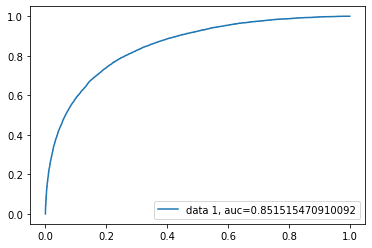

In [39]:
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()